![datiaperti logo](images/datiaperti_small.png)

# Covid-19 Monitoring Notebook 
The Johns Hopkins Center for Systems Science and Engineering (CSSE) operates a [dashboard](https://systems.jhu.edu/research/public-health/ncov/) on the Web to follow the covid-19 cases and deaths all over the world. The data is collected on a daily basis from different sources and has been made available on [Github](https://github.com/CSSEGISandData/COVID-19). This is a selection for some European countries. The observed cases are shown for each country and then merged together for comparison.

[Italy](#Italy)  
[Germany](#Germany)  
[France](#France)  
[Spain](#Spain)  
[Comparisons](#Comparisons)  
[Summary](#Summary)

***
## Definitions
We follow the definitions for measures as given in the book by Bonita et al., [Basic Epidemiology, 2nd ed.](https://apps.who.int/iris/handle/10665/43541) available in different languages from the World Health Organization website. 

***Confirmed Case*** according to the European Centre for Disease Prevention and Control, a person with laboratory confirmation of virus causing COVID-19 infection, irrespective of clinical signs and symptoms.

***Cumulative Incidence*** is the number of new cases of the disease during a specified period of time in a specific healthy population. It represents the risk of becoming ill. In this notebook the period of time considered is from the onset of the disease  up to the last update report and the population at risk is the entire population of a country. The cumulative incidence is computed as the ratio between the cumulative confirmed infections and the country's population, assuming that a vast majority is still healthy, per 100.000 people (see Bonita et al., p.21). If, at any given time point t, C(t) denotes the cumulative confirmed infections and P(t) denotes the population at risk, that we assume for the time being to be the entire population of a country, the cumulative incidence CI(t) is

$$CI(t) = \frac{C(t)}{P(t)}\times100.000$$

***Case Fatality*** represents the ratio between the number of people who have died from the infection and the number of people who have been confirmed to be infected, expressed as a percentage. In this notebook it is computed as the ratio between the cumulative deaths and the cumulative confirmed infections (see Bonita et al., p.22). If, at any given time point t, C(t) denotes the cumulative confirmed infections, as before, and D(t) denotes the cumulative number of deaths, the case fatality CF(t) is 

$$CF(t) = \frac{D(t)}{C(t)}\times100$$

This is a crude estimation of the case fatality that does not take into account the time delay that occurs between the confirmation of an infection and its outcome, being a recovery or a death.  

***Doubling Time*** is the time it takes for a parameter to double in value. In this notebook it is computed for the cumulative confirmed infections by finding the day, before the last one, in which the value was a half. The longer time it takes for the number of infections to double, and the higher is the value of the doubling time, the better.  

***Basic Reproduction Number $R_0$*** is the expected number of secondary cases generated by one infected individual in a population where all individuals are susceptibles, i.e. no one is immunized because of recovery or vaccination. According to the [Susceptible-Infectious-Recovered](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) (SIR) deterministic model, it is possible to predict the number of infections $I(t)$ over the time $t$, at the early stage of an outbreak, using the equation  

$$I(t) = I_0\exp^{\frac{R_0 - 1}{d} t}$$

where $d$ represents the average duration of the infection for an individual. From this equation it can be seen that, if $R_0 > 1$ there will be an epidemic outbreak. A rough estimation of $R_0$ can be computed using the doubling time $\Delta t_2$ such that  


$$\frac{I(t)}{I_0} = \exp^{\frac{R_0 - 1}{d} \Delta t_2} = 2$$


taking the logarithm of both sides we have

$$\frac{R_0 - 1}{d} \Delta t_2 = log(2)$$


and finally 

$$ R_0 = log(2) \frac{d}{\Delta t_2} + 1$$

Assuming a duration of the infection of, e.g. $d = 30$ days from the onset, few days before the symptoms appear till complete recovery, and computing the doubling time from the data of confirmed infections, as soon as they are available, we can get a rough estimation of $R_0$. The basic reproduction number $R_0$ can be used to estimate if and how quickly an infection can spread in a population. Since in the SIR model $R_0$ depends on the rate of contacts that people have, it is clear that social distance is an important action to prevent the spread of the infection, if enacted at its onset. One limitation of $R_0$, computed from the confirmed infection, is that it can underestimate its real value since the majority of the cases are individuals who had only mild or even no symptoms at all.


## References

* [Report of the WHO-China Joint Mission on Coronavirus Disease 2019 (COVID-19)](https://www.who.int/docs/default-source/coronaviruse/who-china-joint-mission-on-covid-19-final-report.pdf)
* [Riou et al. - Adjusted age-specific case fatality ratio during the COVID-19 epidemic in Hubei, China, January and February 2020](https://www.medrxiv.org/content/10.1101/2020.03.04.20031104v1)
* [Russell et al. - Using a delay-adjusted case fatality ratio to estimate under-reporting](https://cmmid.github.io/topics/covid19/severity/global_cfr_estimates.html) 
* [Verity et al. - Estimates of severity of COVID-19 disease](https://www.medrxiv.org/content/10.1101/2020.03.09.20033357v1)
* [Wu et al. - Nowcasting and forecasting the potential domestic and international spread of the 2019-nCoV outbreak originating in Wuhan, China: a modelling study](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20);30260-9/fulltext)
* [Liu et al. - Measurability of the epidemic reproduction number in data-driven contact networks](https://www.ncbi.nlm.nih.gov/pubmed/30463945)

## Software 
This notebook uses python as programming language, and some libraries, pandas for data handling and matplotlib for data visualization. The covid-19 data is handled as pandas time series and is visualized as simple line plot with the dates as x dimension and the observation as y dimension. Bar charts cannot use directly pandas' time series objects so two separated arrays are created from the time series to be used as input for bar charts, days and observations. The solution used may change if better libraries are discovered.

<a href="https://colab.research.google.com/github/luigiselmi/datascience/blob/master/python/covid19-monitoring-notebook.ipynb" target="_blank"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" width="117" height="20"></a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
from platform import python_version
print("python version: %s"%python_version())
print("numpy version: %s"%np.__version__)
print("pandas version: %s"%pd.__version__)
print("matplotlib version: %s"%mpl.__version__)

python version: 3.8.2
numpy version: 1.18.1
pandas version: 1.0.2
matplotlib version: 3.3.1


### Functions
A collection of functions that are not directly available in the python libraries.

In [2]:
def doubling_time(timeseries):
    """Computes the number of days for the values to double since the last day"""
    dt = pd.Series(index = timeseries.index)
    for last_day in timeseries.sort_index(ascending=False).index.strftime('%Y-%m-%d'): 
        for d in timeseries.sort_index(ascending=False).index: # sorts the dates in descending order
            if timeseries[last_day] - timeseries[d] * 2 >= 0:
                dt[last_day] = (pd.to_datetime(last_day) - d).days 
                break
    return dt.fillna(0).astype('int32')

### Data Structures

In [3]:
countries = ['Italy', 'Germany', 'France', 'Spain']
summary = pd.DataFrame(columns = ['Confirmed Infections', 'Doubling Time', 'Incidence', 'Deaths', 'Case Fatality'], 
                       index = countries)

***
## Data sources

### Johns Hopkins CSSE - Covid-19 Epidemiological data 

In [6]:
#url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed_dataset = pd.read_csv(url_confirmed) 
#url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
deaths_dataset = pd.read_csv(url_deaths)
# creates an index of dates
start_date_index = 43 # starts from March 1st
end_date_index = len(confirmed_dataset.columns) 
start_day = pd.to_datetime(confirmed_dataset.columns[start_date_index]).strftime('%Y-%m-%d')
end_day = pd.to_datetime(confirmed_dataset.columns[end_date_index - 1]).strftime('%Y-%m-%d')
date_index = pd.date_range(start_day, end_day)
week_index = pd.date_range(start_day, end_day, freq='W')
date_index_array = [date.strftime('%Y-%m-%d') for date in date_index] # dates array used for plotting

### Eurostat population data

In [7]:
url_population = "https://raw.githubusercontent.com/luigiselmi/datascience/master/python/covid19/data/eurostat_population_by_age_2019.csv"
population = pd.read_csv(url_population)

### Eurostat health care facilities
Number of available beds (2017)

In [8]:
url_beds = "https://raw.githubusercontent.com/luigiselmi/datascience/master/python/covid19/data/eurostat_hlth_rs_bds.csv"
beds = pd.read_csv(url_beds)

***
## Italy

In [9]:
population_it = population[population['country_code'] == 'IT']['total'].values[0]
print("Italy's population (2019) = %d"%population_it)

Italy's population (2019) = 60359546


In [10]:
beds_it = beds[beds['country_code'] == 'IT']['2017'].values[0]
print("Italy's public and private health care facilities, available beds in 2017 = %d"%beds_it)

Italy's public and private health care facilities, available beds in 2017 = 192548


In [11]:
people_per_bed_it =  population_it / beds_it 
print("Number of persons per bed = %.0f"%people_per_bed_it)

Number of persons per bed = 313


### Cumulative confirmed infections
The number of infected individuals each day is the sum of all the confirmed infected individuals from the beginning up to that day.

In [12]:
confirmed_dataset_it = confirmed_dataset[confirmed_dataset['Country/Region'] == 'Italy']
confirmed_dataset_values_it = [confirmed for confirmed in confirmed_dataset_it.values[0][start_date_index:]] 
confirmed_infections_it = pd.Series(confirmed_dataset_values_it, index=date_index)
confirmed_infections_it['2021-04-15':]

2021-04-15    3826156
2021-04-16    3842079
2021-04-17    3857443
2021-04-18    3870131
2021-04-19    3878994
               ...   
2021-12-17    5336795
2021-12-18    5364852
2021-12-19    5389155
2021-12-20    5405360
2021-12-21    5436143
Freq: D, Length: 251, dtype: int64

### Confirmed infections per day
The confirmed infections per day are computed from the cumulative confirmed infections by computing the difference between two consecutive days.

In [13]:
confirmed_per_day_array_it = [confirmed_infections_it[d++1] - confirmed_infections_it[d] for d in range(date_index.size - 1)]
confirmed_per_day_it = pd.Series(confirmed_per_day_array_it, index=date_index[1:])
confirmed_per_day_it['2021-04-15':]

2021-04-15    16963
2021-04-16    15923
2021-04-17    15364
2021-04-18    12688
2021-04-19     8863
              ...  
2021-12-17    28615
2021-12-18    28057
2021-12-19    24303
2021-12-20    16205
2021-12-21    30783
Freq: D, Length: 251, dtype: int64

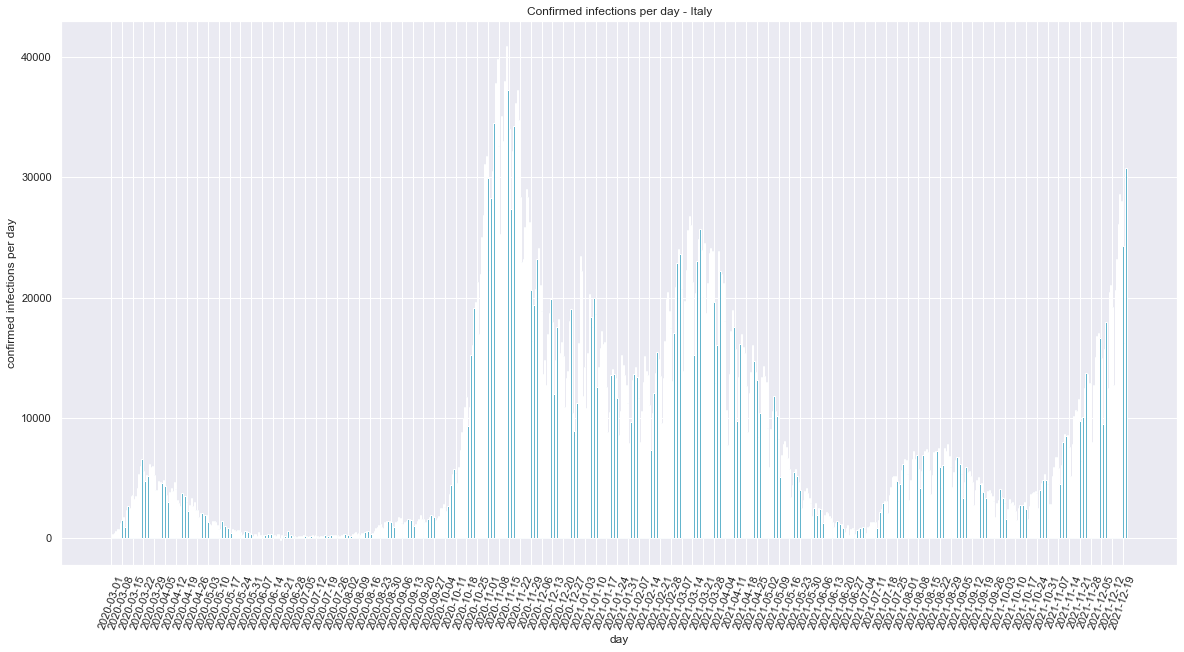

In [14]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Confirmed infections per day - Italy")
ax.set_xlabel("day")
ax.set_ylabel("confirmed infections per day");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.bar(date_index_array[1:], confirmed_per_day_array_it, color='c')
plt.savefig('confirmed-infections-italy.png')

### Cumulative deaths
The number of deaths each day is the sum of the deaths from the beginning up to that day.

In [15]:
deaths_dataset_it = deaths_dataset[deaths_dataset['Country/Region'] == 'Italy']
deaths_dataset_values_it = [death for death in deaths_dataset_it.values[0][start_date_index:]]
deaths_it = pd.Series(deaths_dataset_values_it, index=date_index)
deaths_it['2021-04-15':]

2021-04-15    115937
2021-04-16    116366
2021-04-17    116676
2021-04-18    116927
2021-04-19    117243
               ...  
2021-12-17    135421
2021-12-18    135544
2021-12-19    135641
2021-12-20    135778
2021-12-21    135931
Freq: D, Length: 251, dtype: int64

### Deaths per day
The deaths per day are computed from the cumulative deaths by computing the difference between two consecutive days.

In [16]:
deaths_per_day_array_it = [deaths_it[d++1] - deaths_it[d] for d in range(date_index.size - 1)]
deaths_per_day_it = pd.Series(deaths_per_day_array_it, index=date_index[1:])
deaths_per_day_it['2021-04-15':]

2021-04-15    380
2021-04-16    429
2021-04-17    310
2021-04-18    251
2021-04-19    316
             ... 
2021-12-17    120
2021-12-18    123
2021-12-19     97
2021-12-20    137
2021-12-21    153
Freq: D, Length: 251, dtype: int64

<BarContainer object of 660 artists>

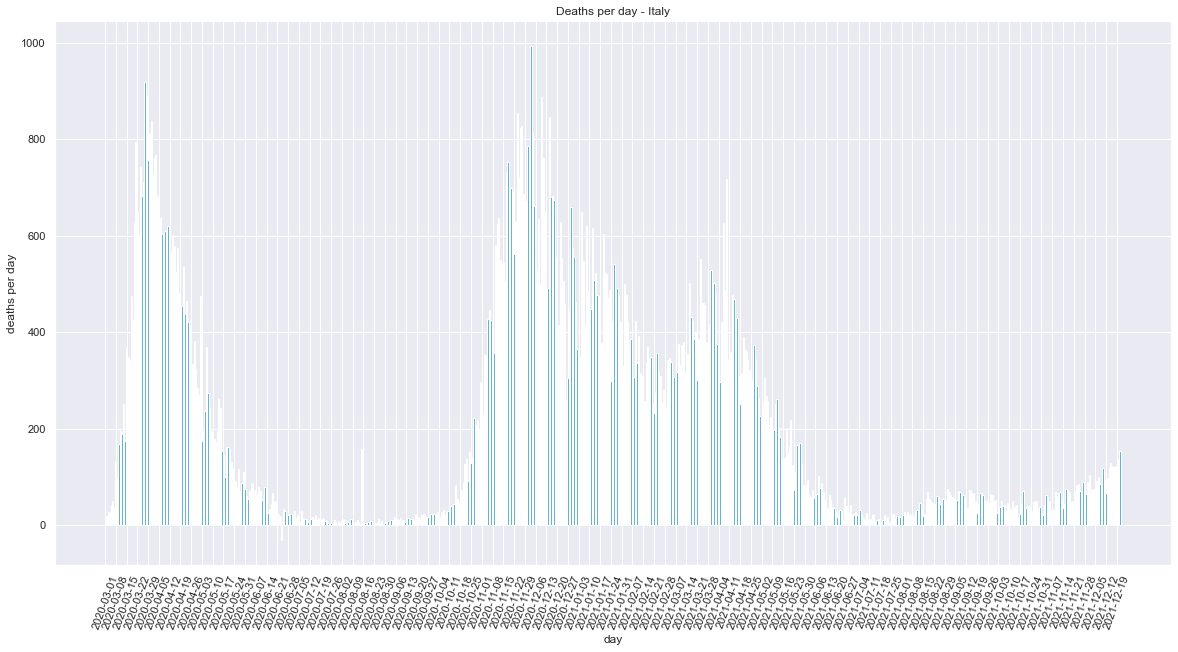

In [17]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Deaths per day - Italy")
ax.set_xlabel("day")
ax.set_ylabel("deaths per day");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.bar(date_index_array[1:], deaths_per_day_array_it, color='c')

### Cumulative confirmed infections doubling time
Number of days for the cumulative confirmed infections to double

In [18]:
doubling_time_it = doubling_time(confirmed_infections_it)[end_day]
summary['Doubling Time']['Italy'] = doubling_time(confirmed_infections_it)[end_day]
print("Italy's cumulative infections doubling time = %.0d days"%doubling_time_it)

Italy's cumulative infections doubling time = 311 days


### Cumulative incidence

In [19]:
cumulative_incidence_it = (confirmed_infections_it[confirmed_infections_it.size - 1] / population_it) * 100000
summary['Incidence']['Italy'] = round((confirmed_infections_it[confirmed_infections_it.size - 1] / population_it) * 100000)
print("Italy's cumulative incidence = %.0f per 100.000 persons"%cumulative_incidence_it)

Italy's cumulative incidence = 9006 per 100.000 persons


### Case fatality

In [20]:
last_infections_it = confirmed_infections_it[confirmed_infections_it.size - 1]
last_deaths_it = deaths_it[deaths_it.size - 1]
last_case_fatality_it = (last_deaths_it / last_infections_it) * 100
summary['Confirmed Infections']['Italy'] = confirmed_infections_it[confirmed_infections_it.size - 1]
summary['Deaths']['Italy'] = deaths_it[deaths_it.size - 1]
summary['Case Fatality']['Italy'] = round((deaths_it[deaths_it.size - 1] / confirmed_infections_it[confirmed_infections_it.size - 1]) * 100,1)
print("Last report day: {0:4s} \ndeaths: {1:5d}; cumulative confirmed infections: {2:5d}; case fatality {3:5.2f} %".format(end_day, last_deaths_it, last_infections_it, last_case_fatality_it))  

Last report day: 2021-12-21 
deaths: 135931; cumulative confirmed infections: 5436143; case fatality  2.50 %


In [21]:
cf_array_it = [(deaths_it[d] / confirmed_infections_it[d]) * 100 for d in range(date_index.size)]
cf_it = pd.Series(cf_array_it, index=date_index)

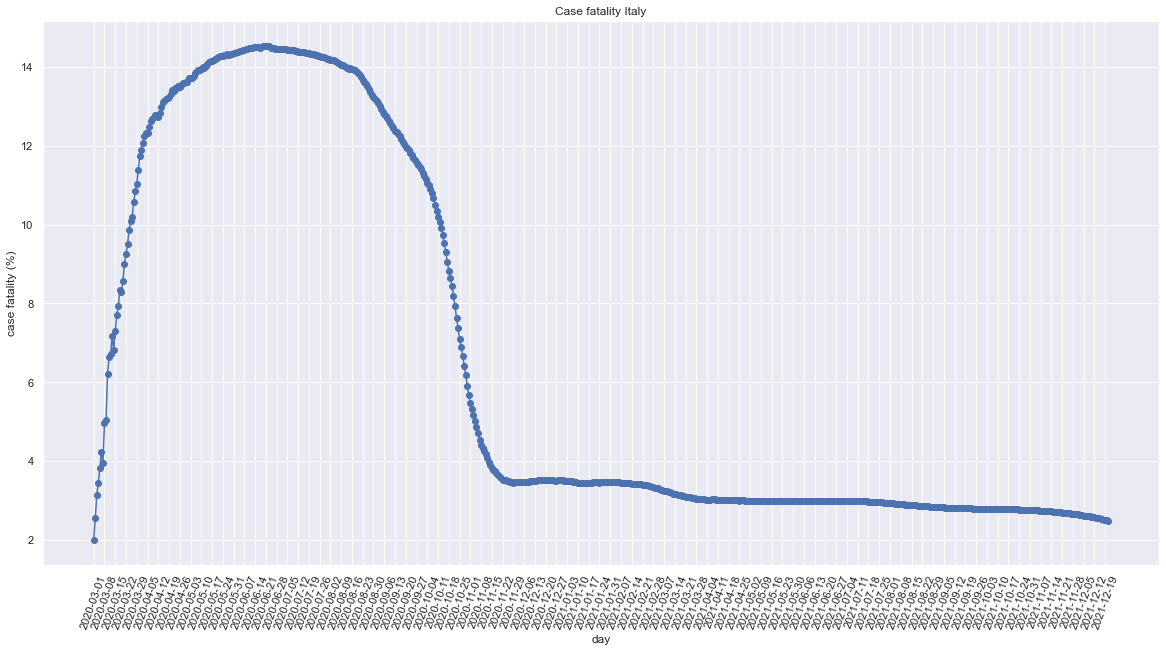

In [22]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Case fatality Italy")
ax.set_xlabel("day")
ax.set_ylabel("case fatality (%)");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(cf_it, marker='o')

***
## Germany

In [23]:
population_de = population[population['country_code'] == 'DE']['total'].values[0]
print("Germany's population (2019) = %d"%population_de)

Germany's population (2019) = 83019213


In [24]:
beds_de = beds[beds['country_code'] == 'DE']['2017'].values[0]
print("Germany's public and private health care facilities, available beds in 2017 = %d"%beds_de)

Germany's public and private health care facilities, available beds in 2017 = 661448


In [25]:
people_per_bed_de =  population_de / beds_de 
print("Number of persons per bed = %.0f"%people_per_bed_de)

Number of persons per bed = 126


### Cumulative confirmed infections
The number of infected individuals each day is the sum of all the confirmed infected individuals from the beginning up to that day.

In [26]:
confirmed_dataset_de = confirmed_dataset[confirmed_dataset['Country/Region'] == 'Germany'] 
confirmed_dataset_values_de = [confirmed for confirmed in confirmed_dataset_de.values[0][start_date_index:]] 
confirmed_infections_de = pd.Series(confirmed_dataset_values_de, index=date_index)
confirmed_infections_de['2021-04-15':] 

2021-04-15    3110252
2021-04-16    3134108
2021-04-17    3154305
2021-04-18    3155522
2021-04-19    3167137
               ...   
2021-12-17    6757684
2021-12-18    6813287
2021-12-19    6812746
2021-12-20    6834488
2021-12-21    6899437
Freq: D, Length: 251, dtype: int64

### Confirmed infections per day
The confirmed infections per day are computed from the cumulative confirmed infections by computing the difference between two consecutive days.

In [27]:
confirmed_per_day_array_de = [confirmed_infections_de[d++1] - confirmed_infections_de[d] for d in range(date_index.size - 1)]
confirmed_per_day_de = pd.Series(confirmed_per_day_array_de, index=date_index[1:])
confirmed_per_day_de['2021-04-15':]

2021-04-15    25110
2021-04-16    23856
2021-04-17    20197
2021-04-18     1217
2021-04-19    11615
              ...  
2021-12-17    15716
2021-12-18    55603
2021-12-19     -541
2021-12-20    21742
2021-12-21    64949
Freq: D, Length: 251, dtype: int64

<BarContainer object of 660 artists>

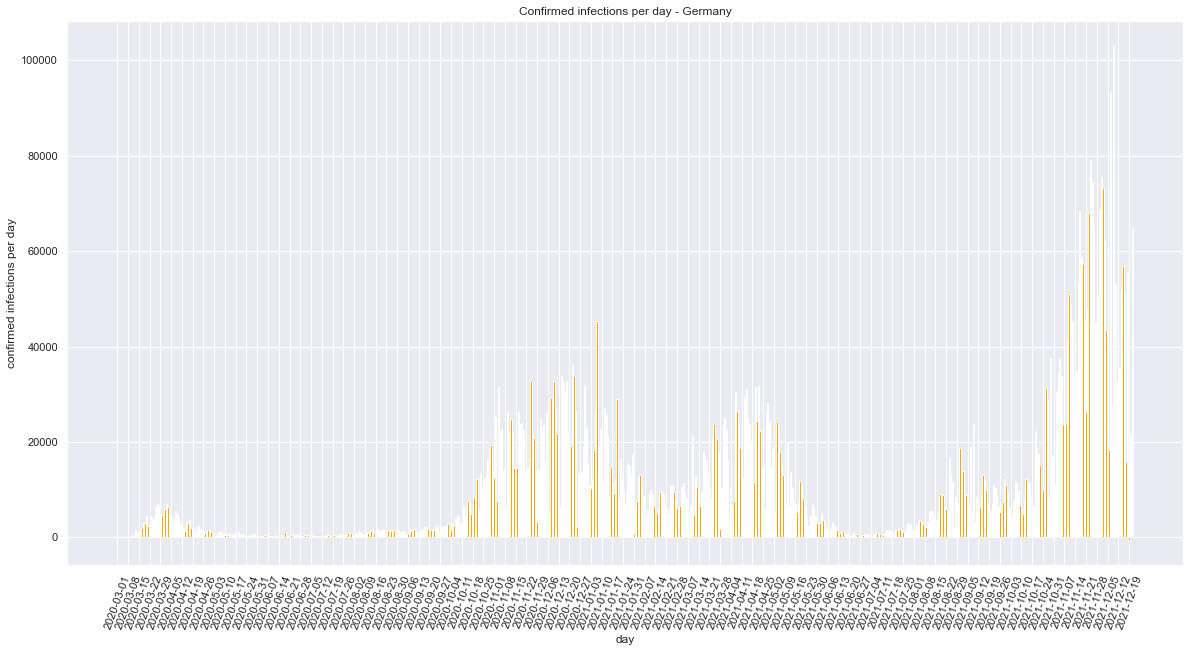

In [28]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Confirmed infections per day - Germany")
ax.set_xlabel("day")
ax.set_ylabel("confirmed infections per day");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.bar(date_index_array[1:], confirmed_per_day_array_de, color='orange')

### Cumulative deaths
The number of deaths each day is the sum of the deaths from the beginning up to that day.

In [29]:
deaths_dataset_de = deaths_dataset[deaths_dataset['Country/Region'] == 'Germany']
deaths_dataset_values_de = [death for death in deaths_dataset_de.values[0][start_date_index:]]
deaths_de = pd.Series(deaths_dataset_values_de, index=date_index)
deaths_de['2021-04-15':]

2021-04-15     79672
2021-04-16     79894
2021-04-17     79971
2021-04-18     80052
2021-04-19     80353
               ...  
2021-12-17    107812
2021-12-18    108238
2021-12-19    108356
2021-12-20    108818
2021-12-21    109328
Freq: D, Length: 251, dtype: int64

### Deaths per day
The deaths per day are computed from the cumulative deaths by computing the difference between two consecutive days.

In [30]:
deaths_per_day_array_de = [deaths_de[d++1] - deaths_de[d] for d in range(date_index.size - 1)]
deaths_per_day_de = pd.Series(deaths_per_day_array_de, index=date_index[1:])
deaths_per_day_de['2021-04-15':]

2021-04-15    245
2021-04-16    222
2021-04-17     77
2021-04-18     81
2021-04-19    301
             ... 
2021-12-17    157
2021-12-18    426
2021-12-19    118
2021-12-20    462
2021-12-21    510
Freq: D, Length: 251, dtype: int64

<BarContainer object of 660 artists>

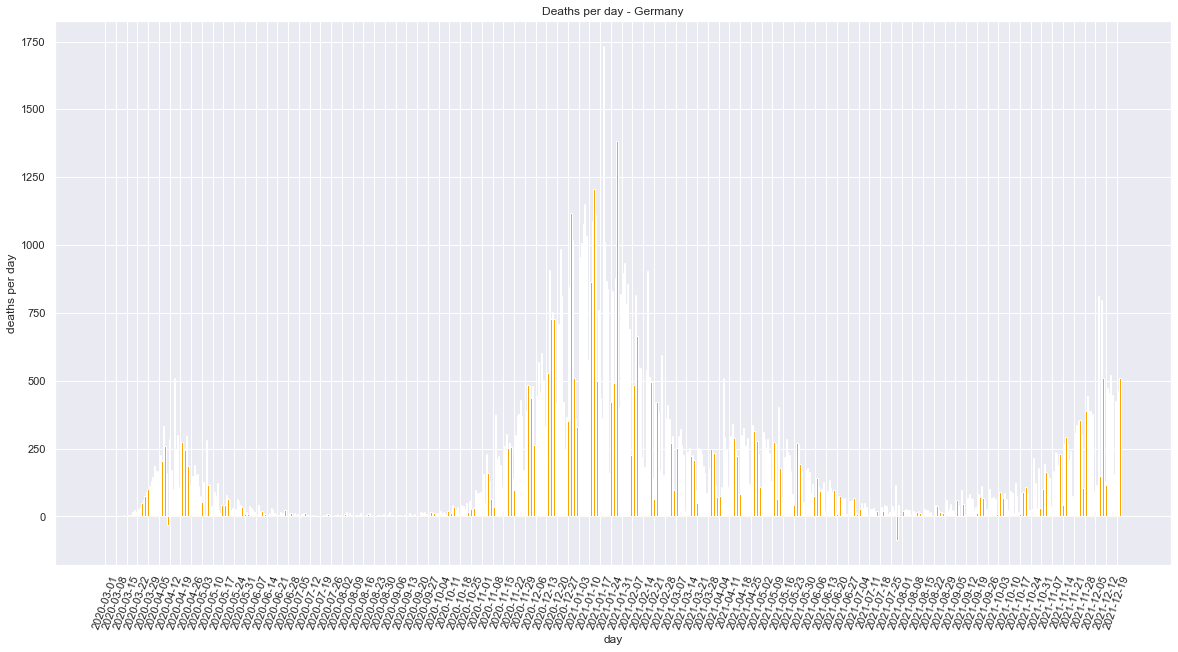

In [31]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Deaths per day - Germany")
ax.set_xlabel("day")
ax.set_ylabel("deaths per day");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.bar(date_index_array[1:], deaths_per_day_array_de, color='orange')

### Cumulative confirmed infections doubling time
Number of days for the cumulative confirmed infections to double

In [32]:
doubling_time_de = doubling_time(confirmed_infections_de)[end_day]
summary['Doubling Time']['Germany'] = doubling_time(confirmed_infections_de)[end_day]
print("Germany's cumulative infections doubling time = %.0d days"%doubling_time_de)

Germany's cumulative infections doubling time = 232 days


### Cumulative incidence

In [33]:
cumulative_incidence_de = (confirmed_infections_de[confirmed_infections_de.size - 1] / population_de) * 100000
summary['Incidence']['Germany'] = round((confirmed_infections_de[confirmed_infections_de.size - 1] / population_de) * 100000)
print("Germany's cumulative incidence = %.0f per 100.000 persons"%cumulative_incidence_de)

Germany's cumulative incidence = 8311 per 100.000 persons


### Case fatality

In [34]:
last_infections_de = confirmed_infections_de[confirmed_infections_de.size - 1]
last_deaths_de = deaths_de[deaths_de.size - 1]
last_case_fatality_de = (last_deaths_de / last_infections_de) * 100 
summary['Confirmed Infections']['Germany'] = confirmed_infections_de[confirmed_infections_de.size - 1]
summary['Deaths']['Germany'] = deaths_de[deaths_de.size - 1]
summary['Case Fatality']['Germany'] = round((deaths_de[deaths_de.size - 1] / confirmed_infections_de[confirmed_infections_de.size - 1]) * 100,1)
print("Last report day: {0:4s} \ndeaths: {1:5d}; cumulative confirmed infections: {2:5d}; case fatality {3:5.2f} %".format(end_day, last_deaths_de, last_infections_de, last_case_fatality_de))  

Last report day: 2021-12-21 
deaths: 109328; cumulative confirmed infections: 6899437; case fatality  1.58 %


In [35]:
cf_array_de = [(deaths_de[d] / confirmed_infections_de[d]) * 100 for d in range(date_index.size)]
cf_de = pd.Series(cf_array_de, index=date_index)

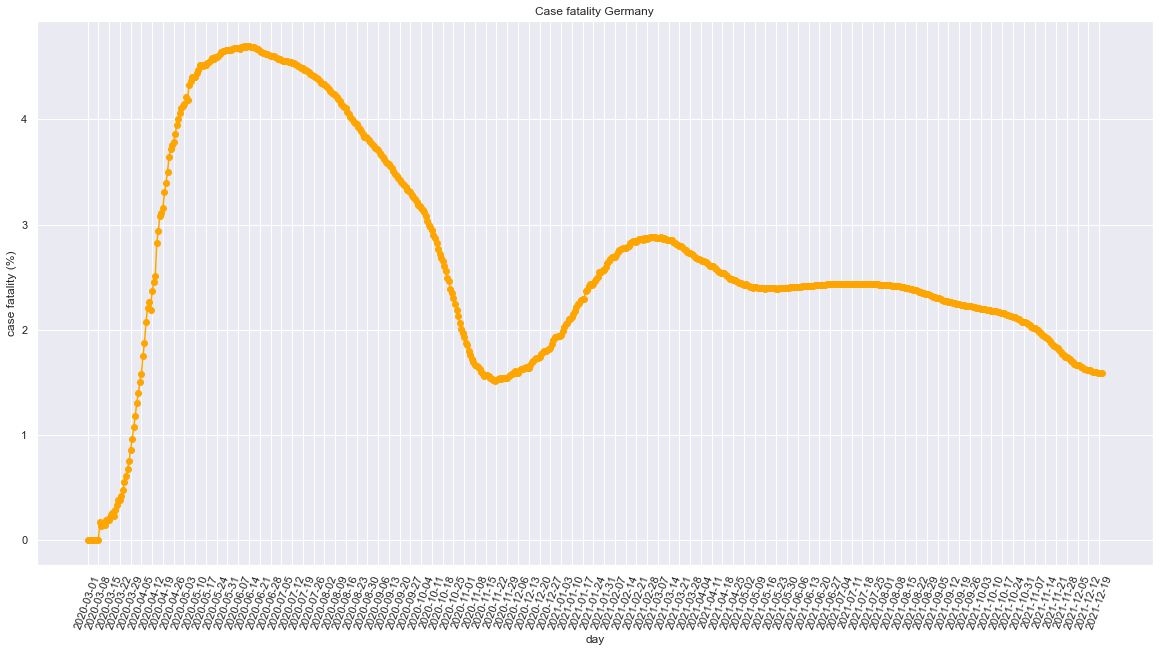

In [36]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Case fatality Germany")
ax.set_xlabel("day")
ax.set_ylabel("case fatality (%)");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(cf_de, color='orange', marker='o')

***
## France

In [37]:
population_fr = population[population['country_code'] == 'FR']['total'].values[0]
print("France's population (2019) = %d"%population_fr)

France's population (2019) = 67012883


In [38]:
beds_fr = beds[beds['country_code'] == 'FR']['2017'].values[0]
print("France's public and private health care facilities, available beds in 2017 = %d"%beds_fr)

France's public and private health care facilities, available beds in 2017 = 399865


In [39]:
people_per_bed_fr =  population_fr / beds_fr 
print("Number of persons per bed = %.0f"%people_per_bed_fr)

Number of persons per bed = 168


### Cumulative confirmed infections
The number of infected individuals each day is the sum of all the confirmed infected individuals from the beginning up to that day.

In [40]:
confirmed_dataset_fr = confirmed_dataset[confirmed_dataset['Country/Region'] == 'France']
row_france = 11
confirmed_dataset_values_fr = [confirmed for confirmed in confirmed_dataset_fr.values[row_france][start_date_index:]] 
confirmed_infections_fr = pd.Series(confirmed_dataset_values_fr, index=date_index)
confirmed_infections_fr['2021-04-15':] 

2021-04-15    5149776
2021-04-16    5186109
2021-04-17    5221888
2021-04-18    5249622
2021-04-19    5256318
               ...   
2021-12-17    8320607
2021-12-18    8379143
2021-12-19    8427616
2021-12-20    8442487
2021-12-21    8515067
Freq: D, Length: 251, dtype: int64

### Confirmed infections per day
The confirmed infections per day are computed from the cumulative confirmed infections by computing the difference between two consecutive days.

In [41]:
confirmed_per_day_array_fr = [confirmed_infections_fr[d++1] - confirmed_infections_fr[d] for d in range(date_index.size - 1)]
confirmed_per_day_fr = pd.Series(confirmed_per_day_array_fr, index=date_index[1:])
confirmed_per_day_fr['2021-04-15':]

2021-04-15    37894
2021-04-16    36333
2021-04-17    35779
2021-04-18    27734
2021-04-19     6696
              ...  
2021-12-17    57987
2021-12-18    58536
2021-12-19    48473
2021-12-20    14871
2021-12-21    72580
Freq: D, Length: 251, dtype: int64

<BarContainer object of 660 artists>

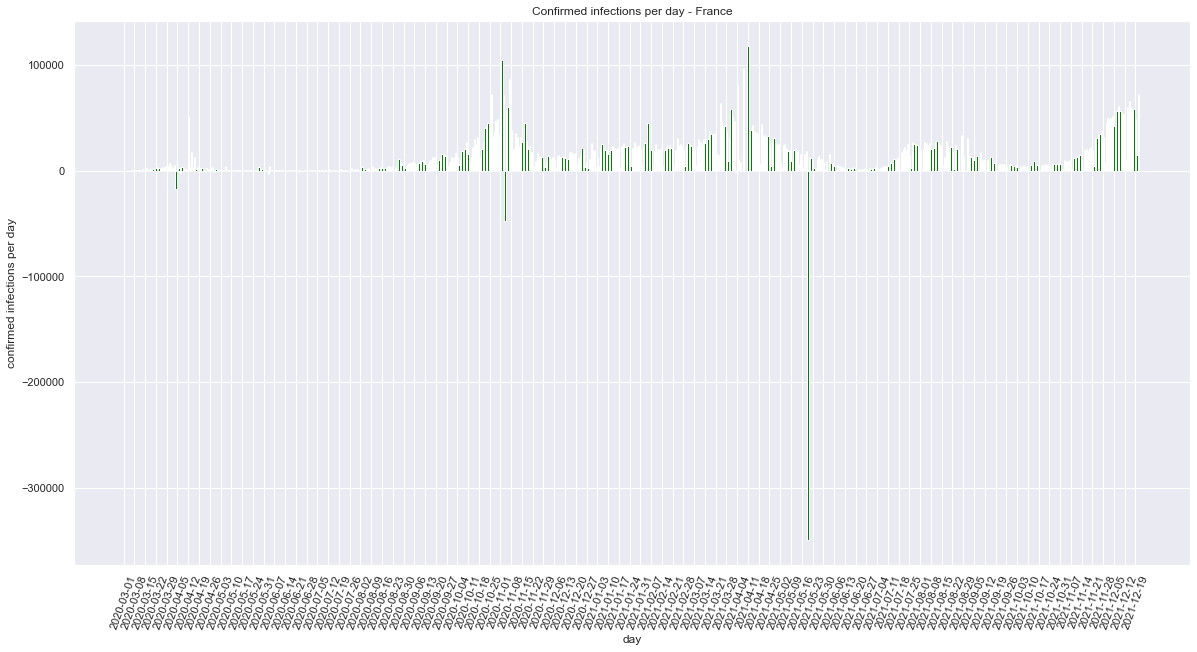

In [42]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Confirmed infections per day - France")
ax.set_xlabel("day")
ax.set_ylabel("confirmed infections per day");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.bar(date_index_array[1:], confirmed_per_day_array_fr, color='green')

### Cumulative deaths
The number of deaths each day is the sum of the deaths from the beginning up to that day.

In [43]:
deaths_dataset_fr = deaths_dataset[deaths_dataset['Country/Region'] == 'France']
deaths_dataset_values_fr = [death for death in deaths_dataset_fr.values[row_france][start_date_index:]]
deaths_fr = pd.Series(deaths_dataset_values_fr, index=date_index)
deaths_fr['2021-04-15':]

2021-04-15     99427
2021-04-16     99758
2021-04-17     99947
2021-04-18    100075
2021-04-19    100522
               ...  
2021-12-17    118836
2021-12-18    118921
2021-12-19    118996
2021-12-20    119212
2021-12-21    119439
Freq: D, Length: 251, dtype: int64

### Deaths per day
The deaths per day are computed from the cumulative deaths by computing the difference between two consecutive days.

In [44]:
deaths_per_day_array_fr = [deaths_fr[d++1] - deaths_fr[d] for d in range(date_index.size - 1)]
deaths_per_day_fr = pd.Series(deaths_per_day_array_fr, index=date_index[1:])
deaths_per_day_fr['2021-04-15':]

2021-04-15    294
2021-04-16    331
2021-04-17    189
2021-04-18    128
2021-04-19    447
             ... 
2021-12-17    160
2021-12-18     85
2021-12-19     75
2021-12-20    216
2021-12-21    227
Freq: D, Length: 251, dtype: int64

<BarContainer object of 660 artists>

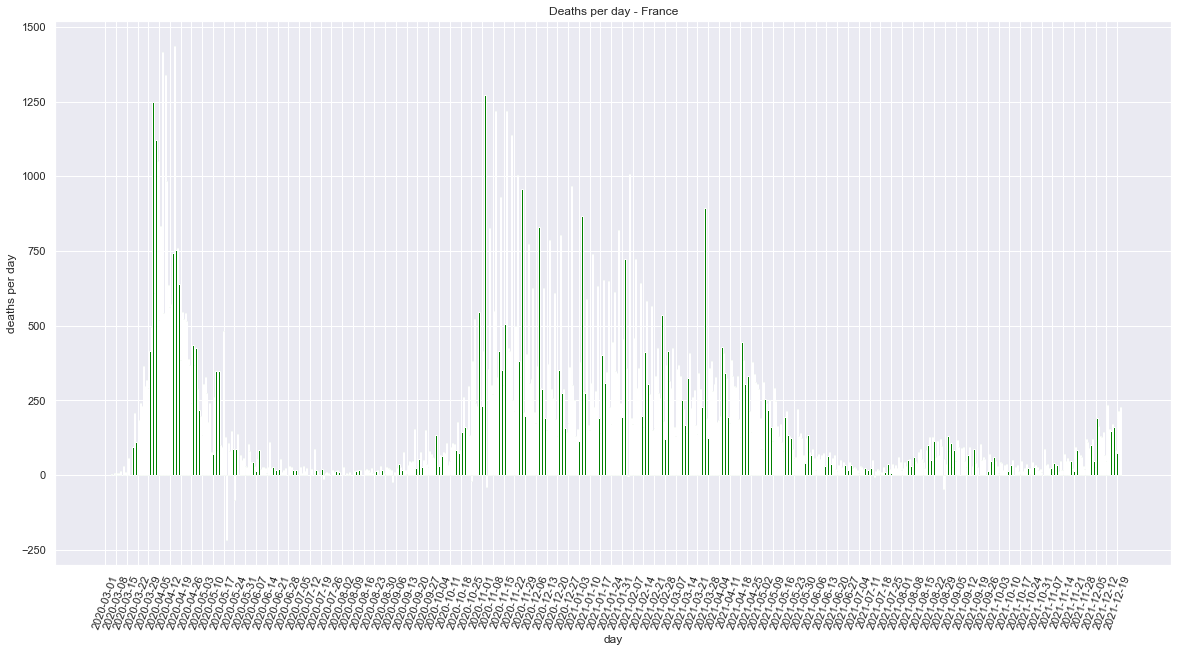

In [45]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Deaths per day - France")
ax.set_xlabel("day")
ax.set_ylabel("deaths per day");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.bar(date_index_array[1:], deaths_per_day_array_fr, color='green')

### Cumulative confirmed infections doubling time
Number of days for the cumulative confirmed infections to double

In [46]:
doubling_time_fr = doubling_time(confirmed_infections_fr)[end_day]
summary['Doubling Time']['France'] = doubling_time(confirmed_infections_fr)[end_day]
print("France's cumulative infections doubling time = %.0d days"%doubling_time_fr)

France's cumulative infections doubling time = 275 days


### Cumulative incidence

In [47]:
cumulative_incidence_fr = (confirmed_infections_fr[confirmed_infections_fr.size - 1] / population_fr) * 100000
summary['Incidence']['France'] = round((confirmed_infections_fr[confirmed_infections_fr.size - 1] / population_fr) * 100000)
print("France's cumulative incidence = %.0f per 100.000 persons"%cumulative_incidence_fr)

France's cumulative incidence = 12707 per 100.000 persons


### Case fatality

In [48]:
last_infections_fr = confirmed_infections_fr[confirmed_infections_fr.size - 1]
last_deaths_fr = deaths_fr[deaths_fr.size - 1]
last_case_fatality_fr = (last_deaths_fr / last_infections_fr) * 100 
summary['Confirmed Infections']['France'] = confirmed_infections_fr[confirmed_infections_fr.size - 1]
summary['Deaths']['France'] = deaths_fr[deaths_fr.size - 1]
summary['Case Fatality']['France'] = round((deaths_fr[deaths_fr.size - 1] / confirmed_infections_fr[confirmed_infections_fr.size - 1]) * 100,1)
print("Last report day: {0:4s} \ndeaths: {1:5d}; cumulative confirmed infections: {2:5d}; case fatality {3:5.2f} %".format(end_day, last_deaths_fr, last_infections_fr, last_case_fatality_fr))  

Last report day: 2021-12-21 
deaths: 119439; cumulative confirmed infections: 8515067; case fatality  1.40 %


In [49]:
cf_array_fr = [(deaths_fr[d] / confirmed_infections_fr[d]) * 100 for d in range(date_index.size)]
cf_fr = pd.Series(cf_array_fr, index=date_index)

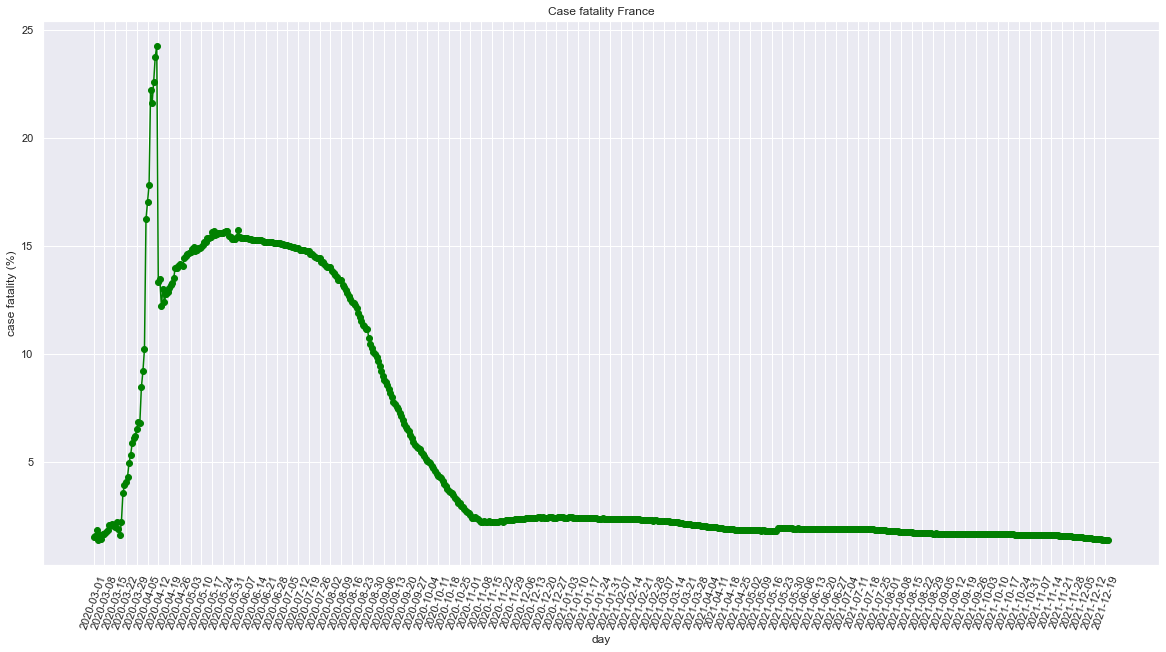

In [50]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Case fatality France")
ax.set_xlabel("day")
ax.set_ylabel("case fatality (%)");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(cf_fr, color='green', marker='o')

***
## Spain

In [51]:
population_es = population[population['country_code'] == 'ES']['total'].values[0]
print("Spain's population (2019) = %d"%population_es)

Spain's population (2019) = 46937060


In [52]:
beds_es = beds[beds['country_code'] == 'ES']['2017'].values[0]
print("Spain's public and private health care facilities, available beds in 2017 = %d"%beds_es)

Spain's public and private health care facilities, available beds in 2017 = 138511


In [53]:
people_per_bed_es =  population_es / beds_es 
print("Number of persons per bed = %.0f"%people_per_bed_es)

Number of persons per bed = 339


### Cumulative confirmed infections
The number of infected individuals each day is the sum of all the confirmed infected individuals from the beginning up to that day.

In [54]:
confirmed_dataset_es = confirmed_dataset[confirmed_dataset['Country/Region'] == 'Spain'] 
confirmed_dataset_values_es = [confirmed for confirmed in confirmed_dataset_es.values[0][start_date_index:]] 
confirmed_infections_es = pd.Series(confirmed_dataset_values_es, index=date_index)
confirmed_infections_es['2021-04-15':] 

2021-04-15    3396685
2021-04-16    3407283
2021-04-17    3407283
2021-04-18    3407283
2021-04-19    3428354
               ...   
2021-12-17    5455527
2021-12-18    5455527
2021-12-19    5455527
2021-12-20    5535231
2021-12-21    5585054
Freq: D, Length: 251, dtype: int64

### Confirmed infections per day
The confirmed infections per day are computed from the cumulative confirmed infections by computing the difference between two consecutive days.

In [55]:
confirmed_per_day_array_es = [confirmed_infections_es[d++1] - confirmed_infections_es[d] for d in range(date_index.size - 1)]
confirmed_per_day_es = pd.Series(confirmed_per_day_array_es, index=date_index[1:])
confirmed_per_day_es['2021-04-15':]

2021-04-15     9663
2021-04-16    10598
2021-04-17        0
2021-04-18        0
2021-04-19    21071
              ...  
2021-12-17    33359
2021-12-18        0
2021-12-19        0
2021-12-20    79704
2021-12-21    49823
Freq: D, Length: 251, dtype: int64

<BarContainer object of 660 artists>

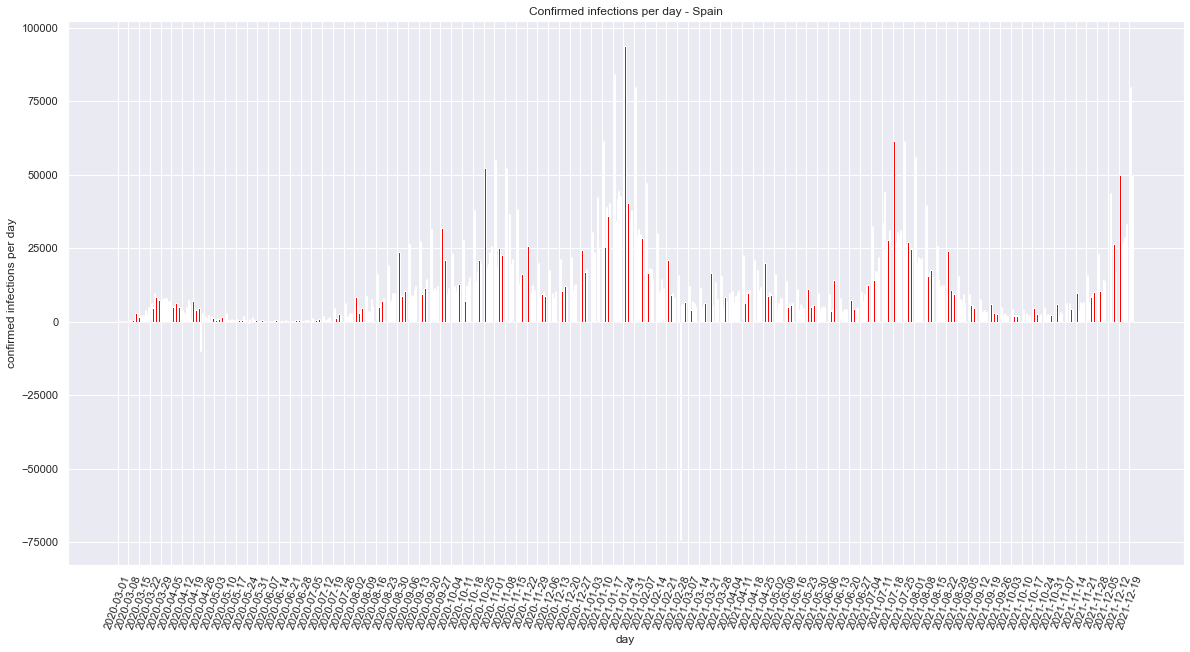

In [56]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Confirmed infections per day - Spain")
ax.set_xlabel("day")
ax.set_ylabel("confirmed infections per day");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.bar(date_index_array[1:], confirmed_per_day_array_es, color='red')

### Cumulative deaths
The number of deaths each day is the sum of the deaths from the beginning up to that day.

In [57]:
deaths_dataset_es = deaths_dataset[deaths_dataset['Country/Region'] == 'Spain']
deaths_dataset_values_es = [death for death in deaths_dataset_es.values[0][start_date_index:]]
deaths_es = pd.Series(deaths_dataset_values_es, index=date_index)
deaths_es['2021-04-15':]

2021-04-15    76882
2021-04-16    76981
2021-04-17    76981
2021-04-18    76981
2021-04-19    77102
              ...  
2021-12-17    88708
2021-12-18    88708
2021-12-19    88708
2021-12-20    88793
2021-12-21    88887
Freq: D, Length: 251, dtype: int64

### Deaths per day
The deaths per day are computed from the cumulative deaths by computing the difference between two consecutive days.

In [58]:
deaths_per_day_array_es = [deaths_es[d++1] - deaths_es[d] for d in range(date_index.size - 1)]
deaths_per_day_es = pd.Series(deaths_per_day_array_es, index=date_index[1:])
deaths_per_day_es['2021-04-15':]

2021-04-15    126
2021-04-16     99
2021-04-17      0
2021-04-18      0
2021-04-19    121
             ... 
2021-12-17     41
2021-12-18      0
2021-12-19      0
2021-12-20     85
2021-12-21     94
Freq: D, Length: 251, dtype: int64

<BarContainer object of 660 artists>

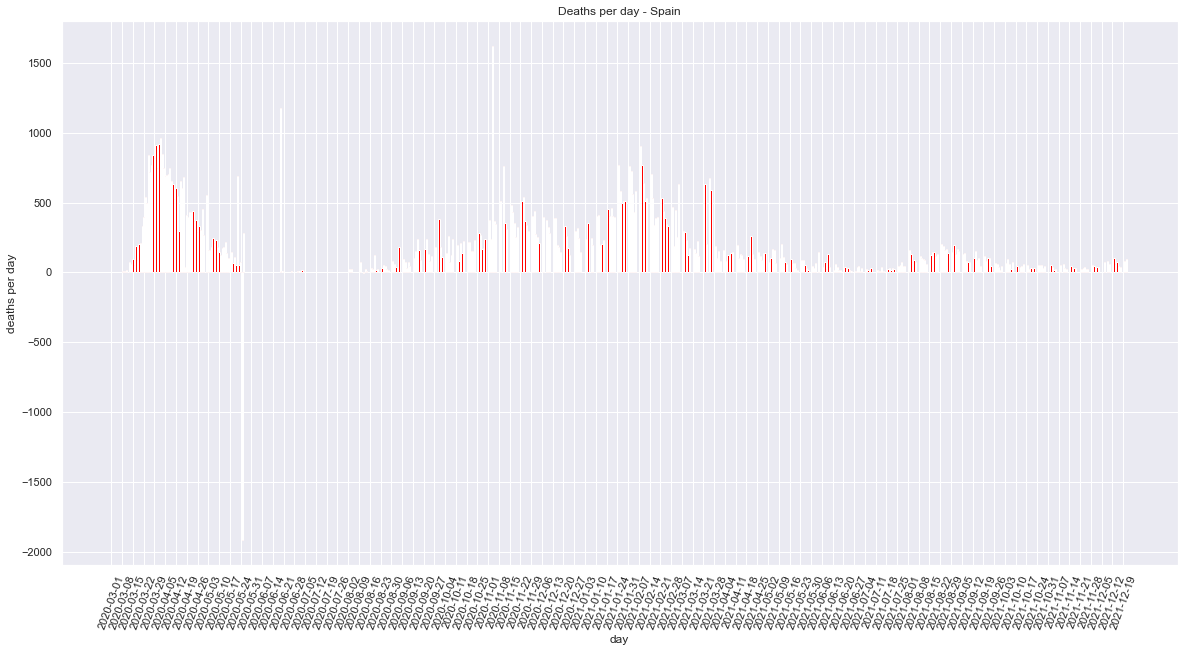

In [59]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Deaths per day - Spain")
ax.set_xlabel("day")
ax.set_ylabel("deaths per day");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.bar(date_index_array[1:], deaths_per_day_array_es, color='red')

### Cumulative confirmed infections doubling time
Number of days for the cumulative confirmed infections to double

In [60]:
doubling_time_es = doubling_time(confirmed_infections_es)[end_day]
summary['Doubling Time']['Spain'] = doubling_time(confirmed_infections_es)[end_day]
print("Spain's cumulative infections doubling time = %.0d days"%doubling_time_es)

Spain's cumulative infections doubling time = 324 days


### Cumulative incidence

In [61]:
cumulative_incidence_es = (confirmed_infections_es[confirmed_infections_es.size - 1] / population_es) * 100000
summary['Incidence']['Spain'] = round((confirmed_infections_es[confirmed_infections_es.size - 1] / population_es) * 100000)
print("Spain's cumulative incidence = %.0f per 100.000 persons"%cumulative_incidence_es)

Spain's cumulative incidence = 11899 per 100.000 persons


### Case fatality

In [62]:
last_infections_es = confirmed_infections_es[confirmed_infections_es.size - 1]
last_deaths_es = deaths_es[deaths_es.size - 1]
last_case_fatality_es = (last_deaths_es / last_infections_es) * 100 
summary['Confirmed Infections']['Spain'] = confirmed_infections_es[confirmed_infections_es.size - 1]
summary['Deaths']['Spain'] = deaths_es[deaths_es.size - 1]
summary['Case Fatality']['Spain'] = round((deaths_es[deaths_es.size - 1] / confirmed_infections_es[confirmed_infections_es.size - 1]) * 100,1)
print("Last report day: {0:4s} \ndeaths: {1:5d}; cumulative confirmed infections: {2:5d}; case fatality {3:5.2f} %".format(end_day, last_deaths_es, last_infections_es, last_case_fatality_es))  

Last report day: 2021-12-21 
deaths: 88887; cumulative confirmed infections: 5585054; case fatality  1.59 %


In [63]:
cf_array_es = [(deaths_es[d] / confirmed_infections_es[d]) * 100 for d in range(date_index.size)]
cf_es = pd.Series(cf_array_es, index=date_index)

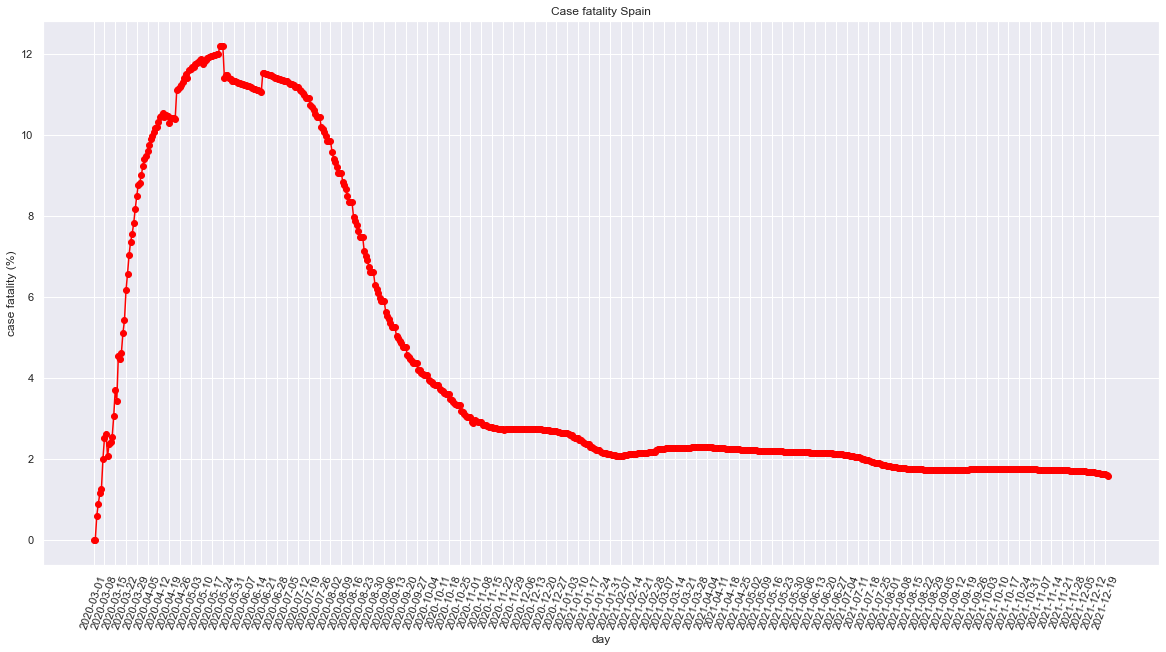

In [64]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Case fatality Spain")
ax.set_xlabel("day")
ax.set_ylabel("case fatality (%)");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(cf_es, color='red', marker='o')

***
## Comparisons
Merged graphs for Italy, Germany, France and Spain

### Cumulative confirmed infections

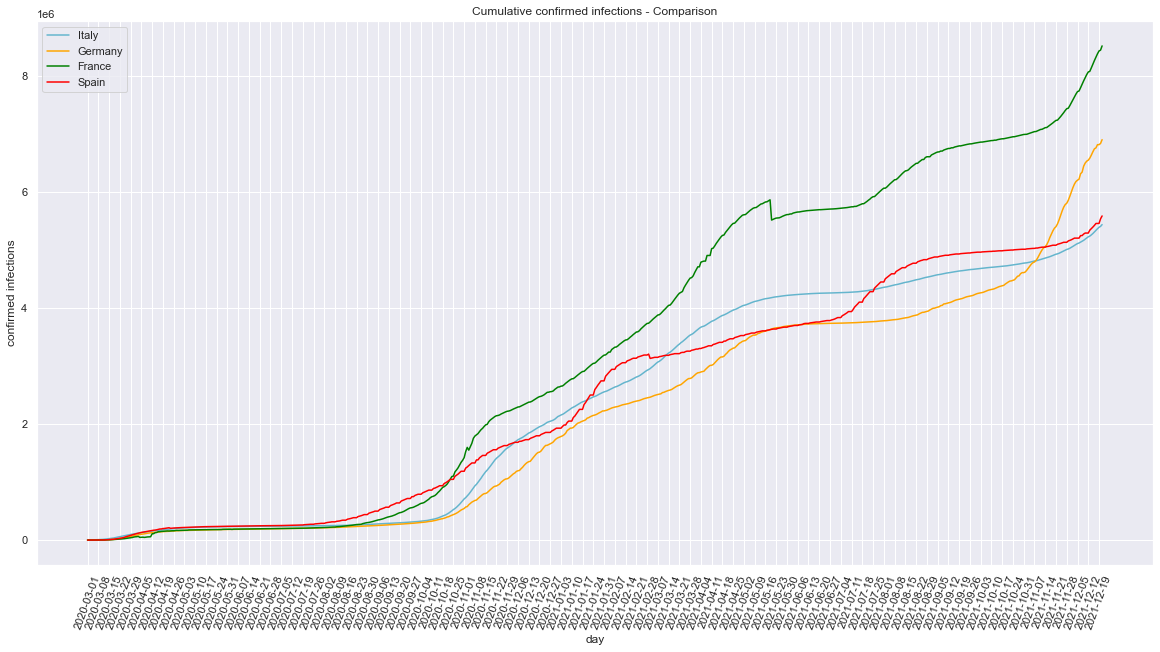

In [65]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Cumulative confirmed infections - Comparison")
ax.set_xlabel("day")
ax.set_ylabel("confirmed infections");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
pi_it, = plt.plot(confirmed_infections_it, label='Italy', color='c')
pi_de, = plt.plot(confirmed_infections_de, label='Germany', color='orange')
pi_fr, = plt.plot(confirmed_infections_fr, label='France', color='green')
pi_es, = plt.plot(confirmed_infections_es, label='Spain', color='red')
plt.legend(handles=[pi_it, pi_de, pi_fr, pi_es])

### Doubling Time
Doubling time for the confirmed infections

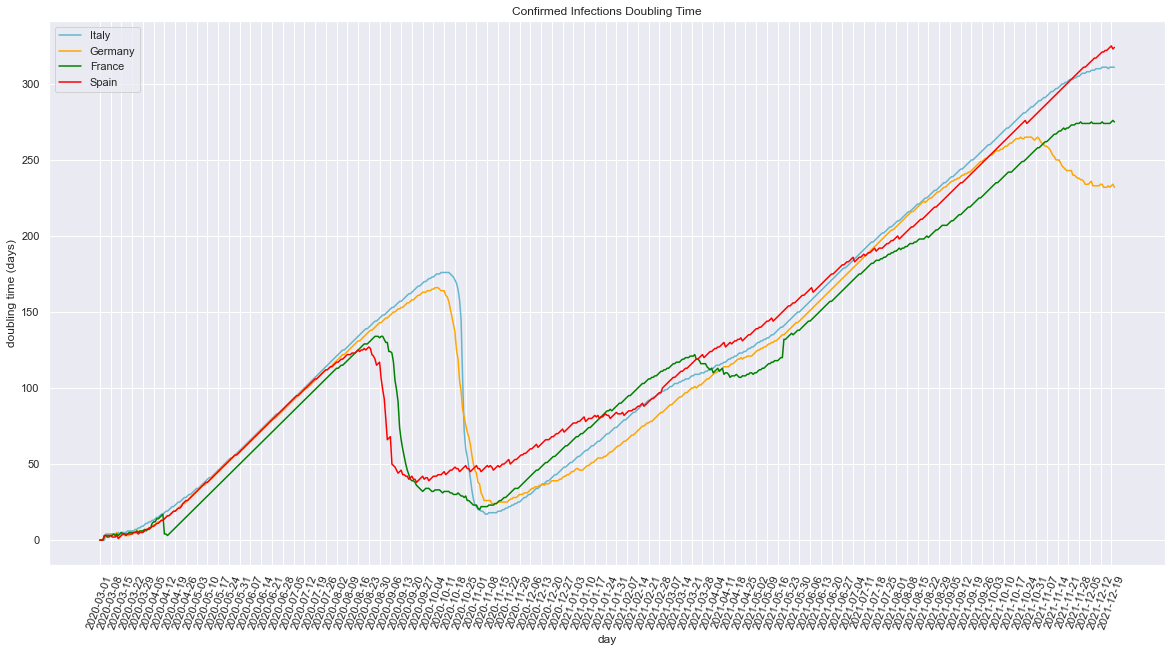

In [66]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Confirmed Infections Doubling Time")
ax.set_xlabel("day")
ax.set_ylabel("doubling time (days)");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
pi_it, = plt.plot(doubling_time(confirmed_infections_it), label='Italy', color='c')
pi_de, = plt.plot(doubling_time(confirmed_infections_de), label='Germany', color='orange')
pi_fr, = plt.plot(doubling_time(confirmed_infections_fr), label='France', color='green')
pi_es, = plt.plot(doubling_time(confirmed_infections_es), label='Spain', color='red')
plt.legend(handles=[pi_it, pi_de, pi_fr, pi_es])
plt.savefig('doubling-time.png')

### Cumulative deaths

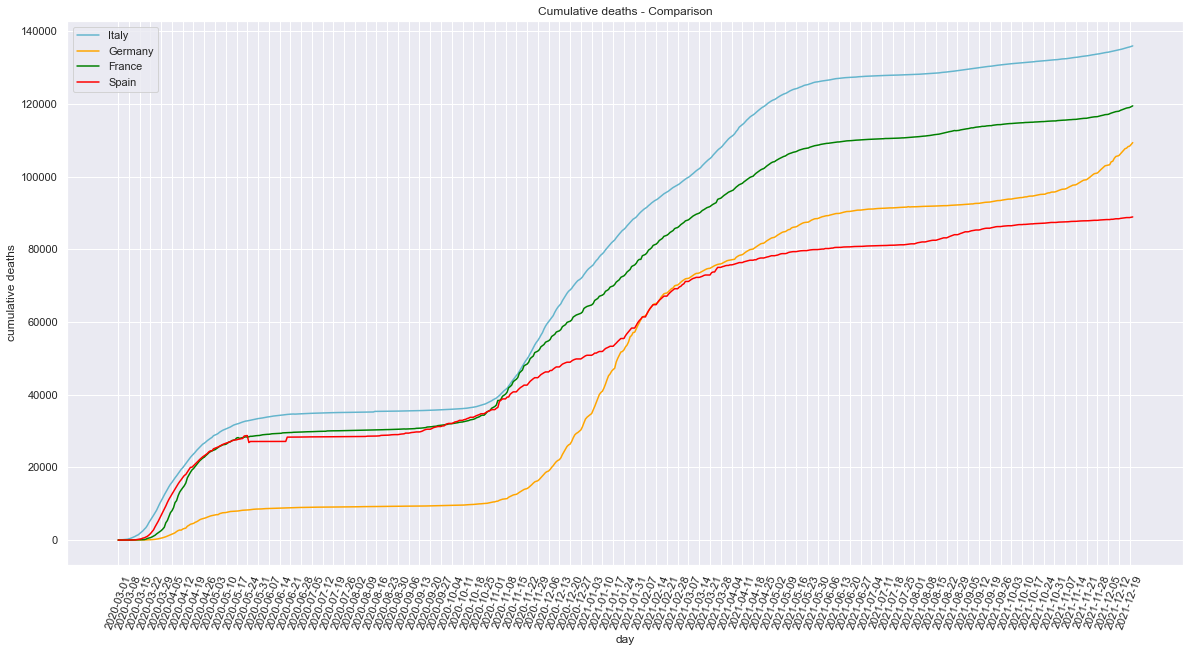

In [67]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Cumulative deaths - Comparison")
ax.set_xlabel("day")
ax.set_ylabel("cumulative deaths");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
pd_it, = plt.plot(deaths_it, label='Italy', color='c')
pd_de, = plt.plot(deaths_de, label='Germany', color='orange')
pd_fr, = plt.plot(deaths_fr, label='France', color='green')
pd_es, = plt.plot(deaths_es, label='Spain', color='red')
plt.legend(handles=[pd_it, pd_de, pd_fr, pd_es])
plt.savefig('cumulative-deaths.png')

### Confirmed infections per day

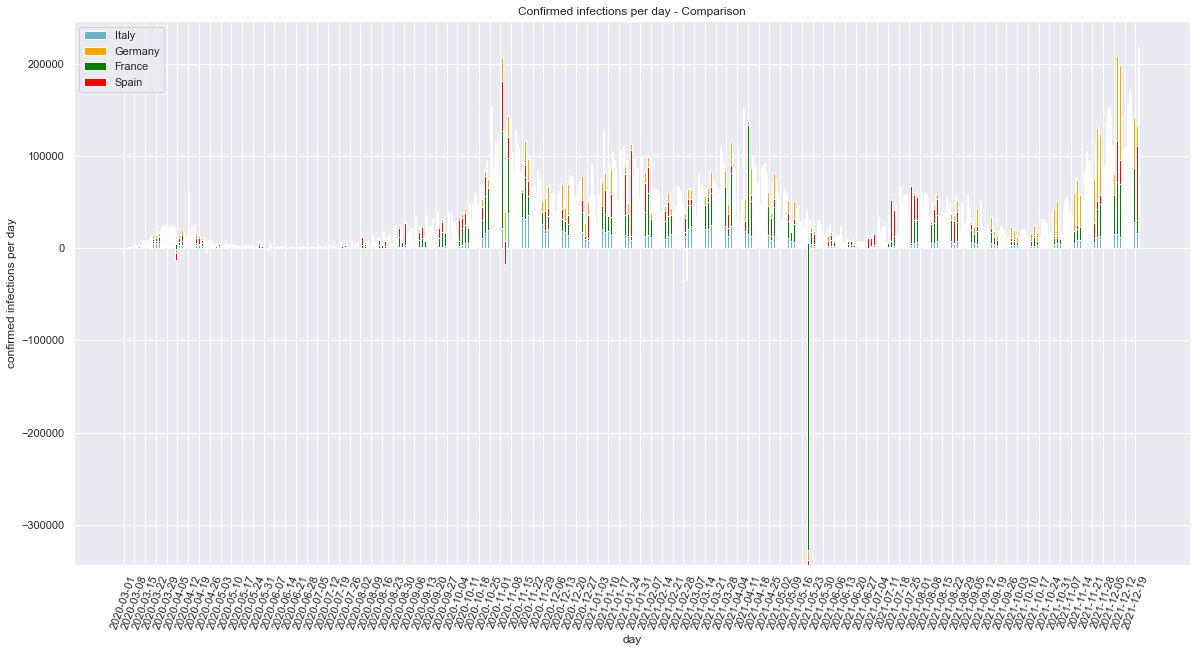

In [68]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Confirmed infections per day - Comparison")
ax.set_xlabel("day")
ax.set_ylabel('confirmed infections per day')
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
pi_it = plt.bar(date_index_array[1:], confirmed_per_day_array_it, color='c')
pi_fr = plt.bar(date_index_array[1:], confirmed_per_day_array_fr, bottom=confirmed_per_day_array_it, color='green')
len_array = len(confirmed_per_day_array_it)
bar_base = [confirmed_per_day_array_it[d] + confirmed_per_day_array_fr[d] for d in range(len_array)]
pi_es = plt.bar(date_index_array[1:], confirmed_per_day_array_es, bottom = bar_base, color='red')
bar_base = [bar_base[d] + confirmed_per_day_array_es[d] for d in range(len_array)] # bottom update
pi_de = plt.bar(date_index_array[1:], confirmed_per_day_array_de, bottom = bar_base, color='orange')
plt.legend((pi_it, pi_de, pi_fr, pi_es), ['Italy', 'Germany', 'France', 'Spain'], loc='upper left')
plt.savefig('deaths-per-day.png')

### Deaths per day

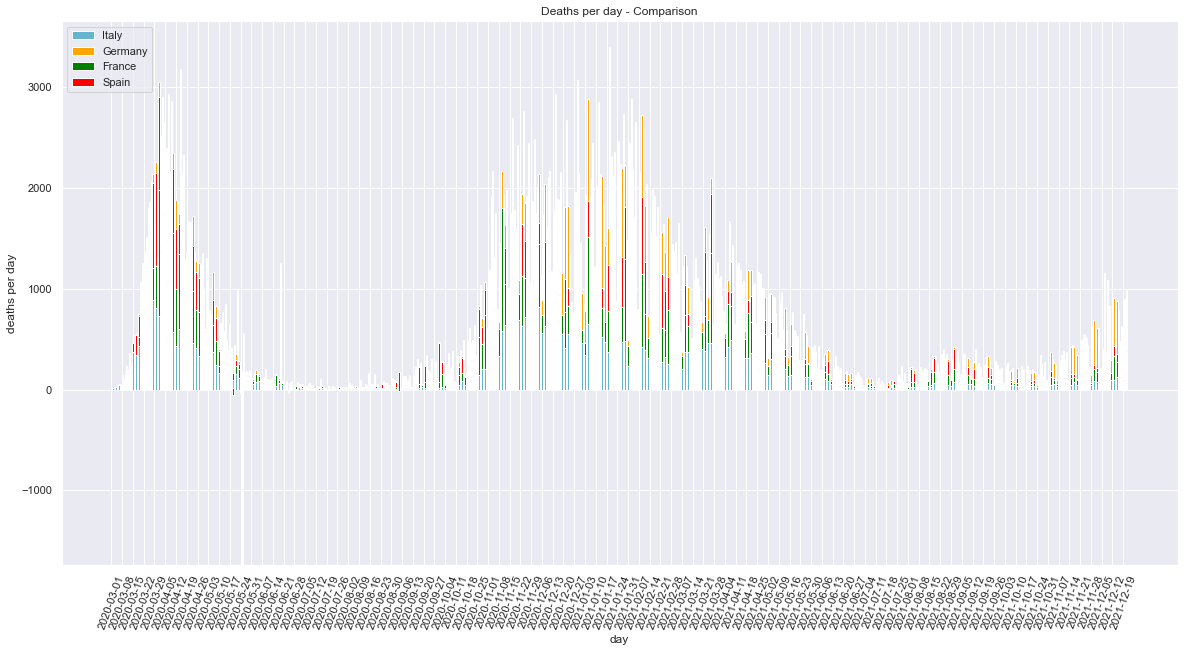

In [69]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Deaths per day - Comparison")
ax.set_xlabel("day")
ax.set_ylabel('deaths per day')
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
pi = plt.bar(date_index_array[1:], deaths_per_day_array_it, color='c')
pf = plt.bar(date_index_array[1:], deaths_per_day_array_fr, bottom = deaths_per_day_array_it, color='green')
len_array = len(deaths_per_day_array_it)
bar_base = [deaths_per_day_array_it[d] + deaths_per_day_array_fr[d] for d in range(len_array)]
ps = plt.bar(date_index_array[1:], deaths_per_day_array_es, bottom = bar_base, color='red')
bar_base = [bar_base[d] + deaths_per_day_array_es[d] for d in range(len_array)]
pg = plt.bar(date_index_array[1:], deaths_per_day_array_de, bottom = bar_base, color='orange')
plt.legend((pi[0], pg[0], pf[0], ps[0]), ['Italy', 'Germany', 'France', 'Spain'], loc='upper left')
#plt.savefig('deaths-per-day.png')

### Case fatality

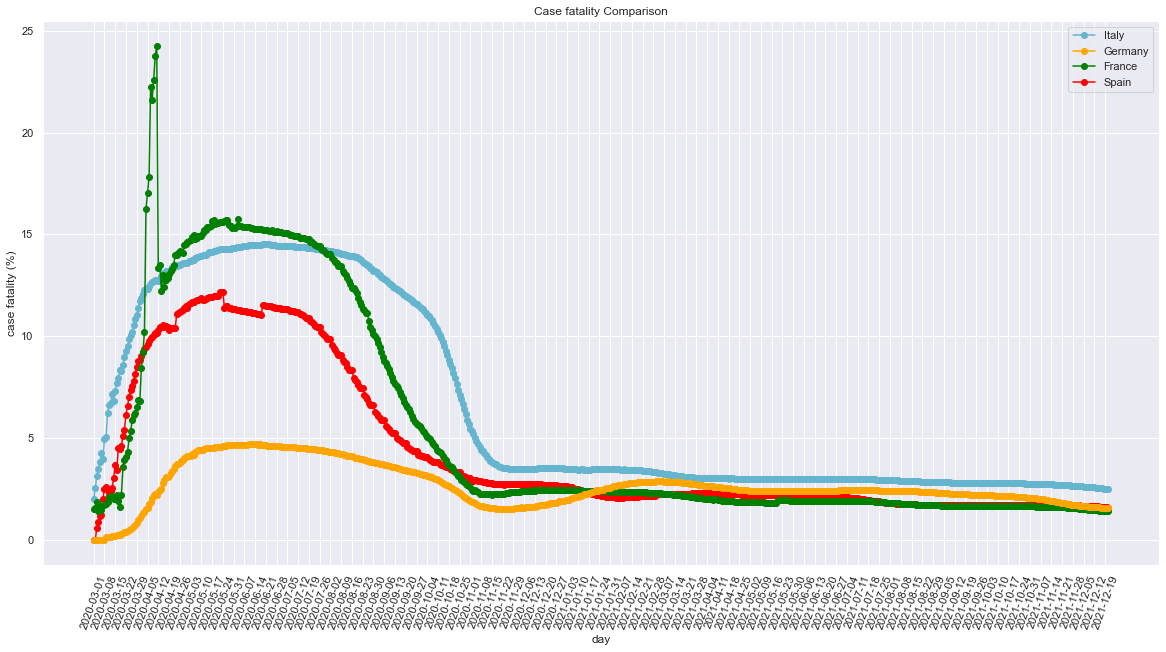

In [70]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Case fatality Comparison")
ax.set_xlabel("day")
ax.set_ylabel("case fatality (%)");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
pcf_it = plt.plot(cf_it, color='c', marker='o')
pcf_es = plt.plot(cf_es, color='red', marker='o')
pcf_fr = plt.plot(cf_fr, color='green', marker='o')
pcf_de = plt.plot(cf_de, color='orange', marker='o')
plt.legend((pcf_it[0], pcf_de[0], pcf_fr[0], pcf_es[0]), ['Italy', 'Germany', 'France', 'Spain'])
#plt.savefig('case_fatalities-2020-03-22.png')

***
## Summary

In [71]:
print("Last report day: ", end_day)  

Last report day:  2021-12-21


In [72]:
summary

,Confirmed Infections,Doubling Time,Incidence,Deaths,Case Fatality
Italy,5436143,311,9006,135931,2.5
Germany,6899437,232,8311,109328,1.6
France,8515067,275,12707,119439,1.4
Spain,5585054,324,11899,88887,1.6


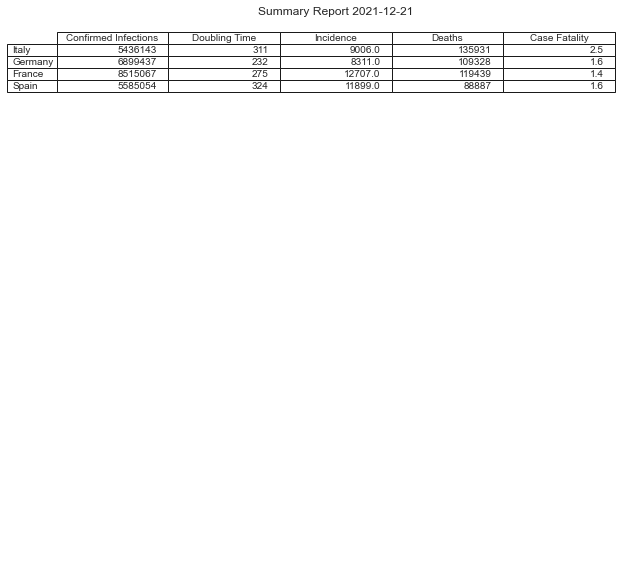

In [73]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(frame_on=False)
ax.axis('off')
ax.table(cellText=summary.values, rowLabels=summary.index, colLabels=summary.columns, loc='upper center')
plt.title('Summary Report ' + end_day)
plt.savefig('summary.png')